# Read .trs file to python

In [1]:
import trsfile
import numpy as np
import matplotlib.pylab as plt

with trsfile.open('SequenceAcquisition_12_04_2021_1m_new.trs', 'r') as traces:
    for header, value in traces.get_headers().items():
        print(header, '=', value)
    print()

Header.NUMBER_TRACES = 1000000
Header.NUMBER_SAMPLES = 3500
Header.SAMPLE_CODING = SampleCoding.BYTE
Header.LENGTH_DATA = 33
Header.TITLE_SPACE = 128
Header.TRACE_TITLE = trace
Header.OFFSET_X = 4294967046
Header.LABEL_X = s
Header.LABEL_Y = V
Header.SCALE_X = 9.999999717180685e-10
Header.SCALE_Y = 0.0004474431916605681
Header.TRS_VERSION = 2
Header.TRACE_SET_PARAMETERS = TraceSetParameterMap([('X_OFFSET', <trsfile.traceparameter.IntegerArrayParameter object at 0x7f42e80302e0>), ('SETUP:OSCILLOSCOPE:COUNT', <trsfile.traceparameter.IntegerArrayParameter object at 0x7f42e8030370>), ('SETUP:OSCILLOSCOPE:ACTIVE_CHANNEL_COUNT', <trsfile.traceparameter.IntegerArrayParameter object at 0x7f42e80303a0>), ('SETUP:OSCILLOSCOPE:RANGE', <trsfile.traceparameter.FloatArrayParameter object at 0x7f42e8030430>), ('SETUP:OSCILLOSCOPE:COUPLING', <trsfile.traceparameter.IntegerArrayParameter object at 0x7f42e8030040>), ('SETUP:OSCILLOSCOPE:INPUT_IMPEDANCE', <trsfile.traceparameter.FloatArrayParameter objec

In [52]:
trace_list = []
with trsfile.open('SequenceAcquisition_pico_hwascon_145147_100kspts.trs', 'r') as traces:
    for i, trace in enumerate(traces[0:5]):
        print(trace)
        trace_list.append(trace)
        print(trace.parameters['INPUT'],trace.parameters['OUTPUT'])

<Trace CH3 0: 100000 samples, 3 parameters>
0x59A39D3E31A85EAAD07463EC502C5B36 0x3144323639353345374438393846444633333642424135463443363742344632
<Trace CH3 1: 100000 samples, 3 parameters>
0xC6538FF95EE37DF96A68008C074E548C 0x3445383330303437373143303334463938344331384434463636373638333946
<Trace CH3 2: 100000 samples, 3 parameters>
0xA6F90533F324867707A56867D559F701 0x4431433441394131423344364634303046453745334535424545383339423536
<Trace CH3 3: 100000 samples, 3 parameters>
0xA4823D10874771EA24CC22732C5D7429 0x3542384144394238373745444132363333343944443937354435313138444334
<Trace CH3 4: 100000 samples, 3 parameters>
0x4A9642B2ACC352E9B97EAC740B02E13F 0x4246324541453135433941314538463643393135343044463139354134383144


In [8]:
with trsfile.open('SequenceAcquisition_pico_hwascon_145147_100kspts.trs', 'r') as traces:
    for i, trace in enumerate(traces[0:6]):
        print(trace.parameters['INPUT'],trace.parameters['OUTPUT'])

0x59A39D3E31A85EAAD07463EC502C5B36 0x3144323639353345374438393846444633333642424135463443363742344632
0xC6538FF95EE37DF96A68008C074E548C 0x3445383330303437373143303334463938344331384434463636373638333946
0xA6F90533F324867707A56867D559F701 0x4431433441394131423344364634303046453745334535424545383339423536
0xA4823D10874771EA24CC22732C5D7429 0x3542384144394238373745444132363333343944443937354435313138444334
0x4A9642B2ACC352E9B97EAC740B02E13F 0x4246324541453135433941314538463643393135343044463139354134383144
0xC86B435864CC80219EB27B3793C2B161 0x3831413845413331383131363135313839423235463535463644333332443335


# Save .trs INPUT to .mat

In [50]:
from scipy.io import savemat

with trsfile.open('SequenceAcquisition_12_04_2021_1m_new.trs', 'r') as traces:
    attack_input = []
    for i, trace in enumerate(traces[0:1000000]):
        attack_input.append(str(trace.parameters['INPUT']))

In [51]:
input_array = []
for i in range (len(attack_input)):
    b = bytes.fromhex(attack_input[i][2:])
    one_array = np.frombuffer(b,dtype=np.uint8)
    input_array.append(one_array)
print(len(input_array))
print(len(input_array[0]))

1000000
16


In [53]:
import scipy
scipy.io.savemat('FAME_COAES_mat_file/fame_coaes_input_1m.mat', {'fame_coaes_input_1m': input_array})

# Save .trs TRACES to .mat

In [18]:
import trsfile
with trsfile.open('SequenceAcquisition_12_04_2021_1m_new.trs', 'r') as traces:
    trace_list = []
    for i, trace in enumerate(traces[0:500000]):
        trace_list.append(trace[:4500])

In [19]:
import scipy
from scipy.io import savemat

scipy.io.savemat('fame_coaes_traces_500k_new.mat', {'fame_coaes_traces_500k_new': trace_list})

# Plot Power and Peaks

<Figure size 432x288 with 0 Axes>

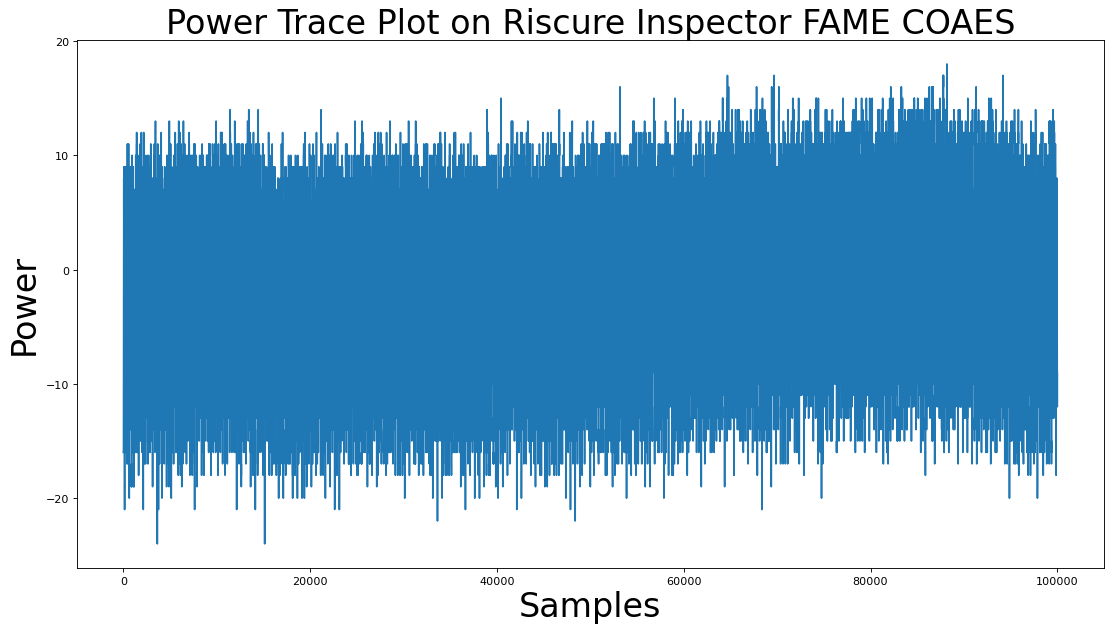

In [9]:
from matplotlib.pyplot import figure
plt.figure()
figure(figsize=(14, 8), dpi=80)
plt.plot(trace_list[1])
plt.title('Power Trace Plot on Riscure Inspector FAME COAES',size=30)
plt.xlabel('Samples',size=30)
plt.ylabel('Power',size=30)
plt.tight_layout()
#plt.savefig('1.jpg',dpi=300)

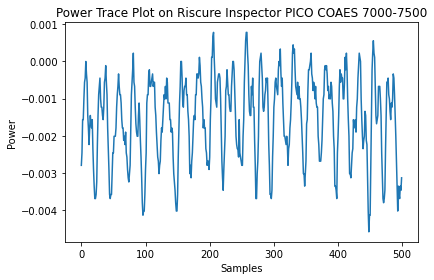

In [93]:
from matplotlib.pyplot import figure
plt.plot(trace_list[1][7000:7500])
plt.title('Power Trace Plot on Riscure Inspector PICO COAES 7000-7500')
plt.xlabel('Samples')
plt.ylabel('Power')
plt.tight_layout()
plt.savefig('1.jpg',dpi=300)

In [61]:
attack_results = []
with trsfile.open('SequenceAcquisition_pico_coaes_1.5mtraces_8ksamples_ + First order analysis.trs', 'r') as traces:
    for header, value in traces.get_headers().items():
        print(header, '=', value)
    print()
    attack_results = []
    for i, trace in enumerate(traces[0:4096]):
        attack_results.append(trace.samples)

Header.NUMBER_TRACES = 4096
Header.NUMBER_SAMPLES = 500
Header.SAMPLE_CODING = SampleCoding.FLOAT
Header.TITLE_SPACE = 128
Header.TRACE_TITLE = trace
Header.OFFSET_X = 7000
Header.TRS_VERSION = 2
Header.TRACE_SET_PARAMETERS = TraceSetParameterMap([('Y_SCALE', <trsfile.traceparameter.FloatArrayParameter object at 0x7f7972e4ff40>), ('DISPLAY_HINT:Y_LABEL', <trsfile.traceparameter.StringParameter object at 0x7f7972e4f250>), ('X_OFFSET', <trsfile.traceparameter.IntegerArrayParameter object at 0x7f7972e4f130>), ('TRACE_OFFSET', <trsfile.traceparameter.IntegerArrayParameter object at 0x7f7972e4fca0>), ('DISPLAY_HINT:USE_LOG_SCALE', <trsfile.traceparameter.BooleanArrayParameter object at 0x7f7972e4fd90>), ('DISPLAY_HINT:X_LABEL', <trsfile.traceparameter.StringParameter object at 0x7f7972dc2fd0>), ('X_SCALE', <trsfile.traceparameter.FloatArrayParameter object at 0x7f7972dc24f0>), ('DISPLAY_HINT:NUM_TRACES_SHOWN', <trsfile.traceparameter.IntegerArrayParameter object at 0x7f7972dc2f40>), ('DISPL

In [62]:
attack_results = np.array(attack_results)
attack_results_per_byte = np.split(attack_results,16)

In [63]:
a = '2b7e151628aed2a6abf7158809cf4f3c'
key_array = []
b = bytes.fromhex(a)
key_array = np.frombuffer(b,dtype=np.uint8)
key_array

array([ 43, 126,  21,  22,  40, 174, 210, 166, 171, 247,  21, 136,   9,
       207,  79,  60], dtype=uint8)

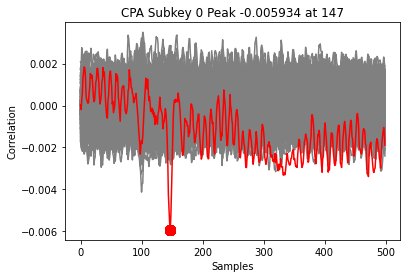

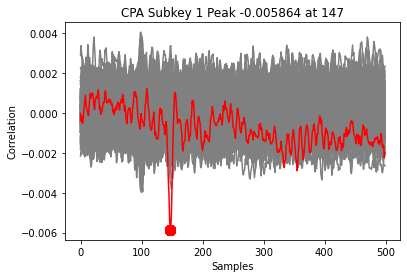

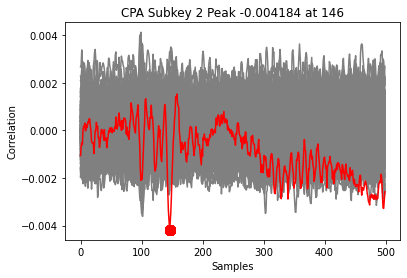

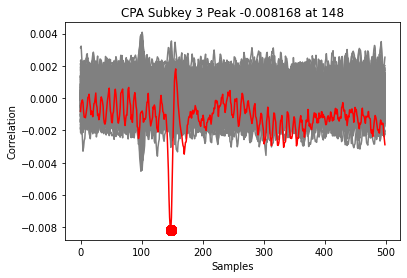

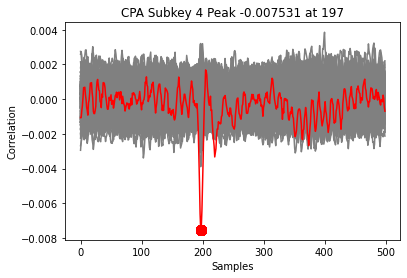

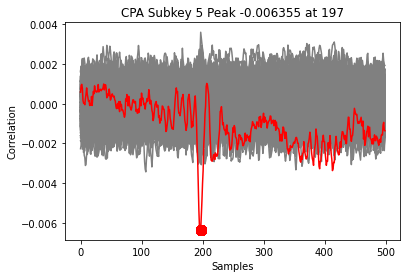

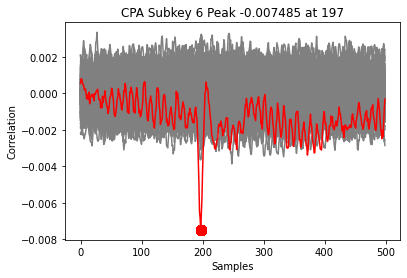

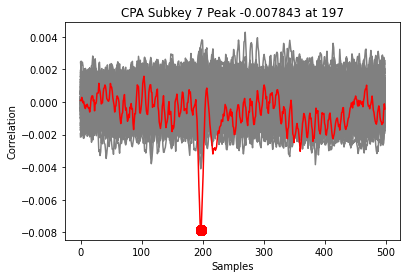

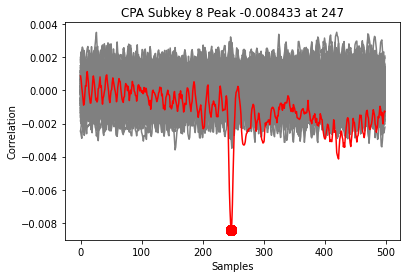

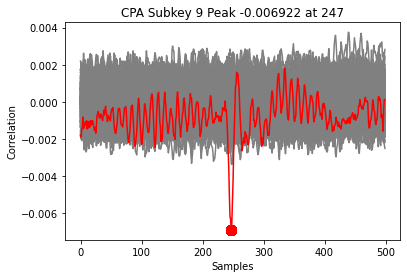

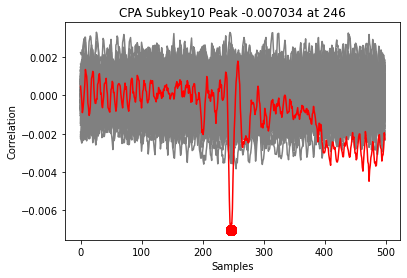

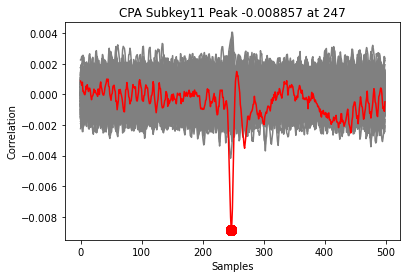

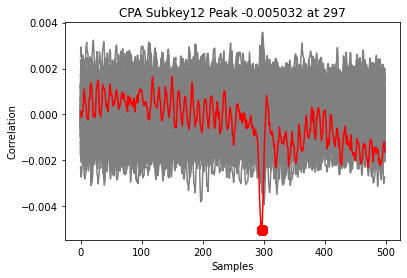

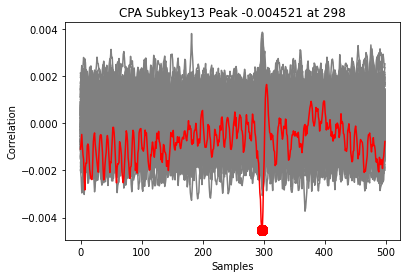

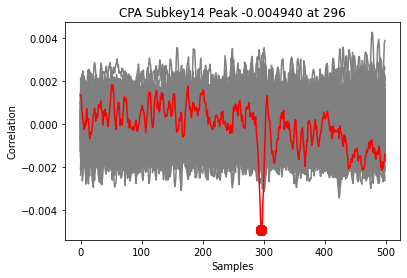

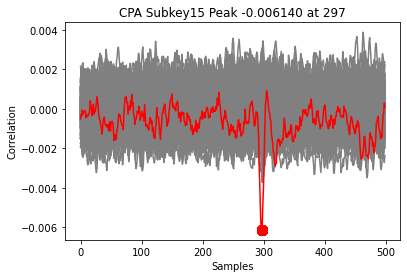

In [75]:
for subkey in range (16):
    plt.figure()
    for guess in range(0, 256):
        if (guess == key_array[subkey]):
            plt.plot(attack_results_per_byte[subkey][guess],color="red",linewidth=1.5, linestyle='-',zorder=255)
        else:
            plt.plot(attack_results_per_byte[subkey][guess],color="grey")
        corr = abs(attack_results_per_byte[subkey][key_array[subkey]])
        xmax = np.argmax(corr)
        ymax = corr.max()
        plt.plot([xmax],[-ymax],marker='.', markersize=20, color="red",zorder=255)
        plt.title('CPA Subkey%2d Peak %2f at %d' %(subkey,-ymax,xmax))
        plt.xlabel('Samples')
        plt.ylabel('Correlation')
    plt.show()

<Figure size 432x288 with 0 Axes>

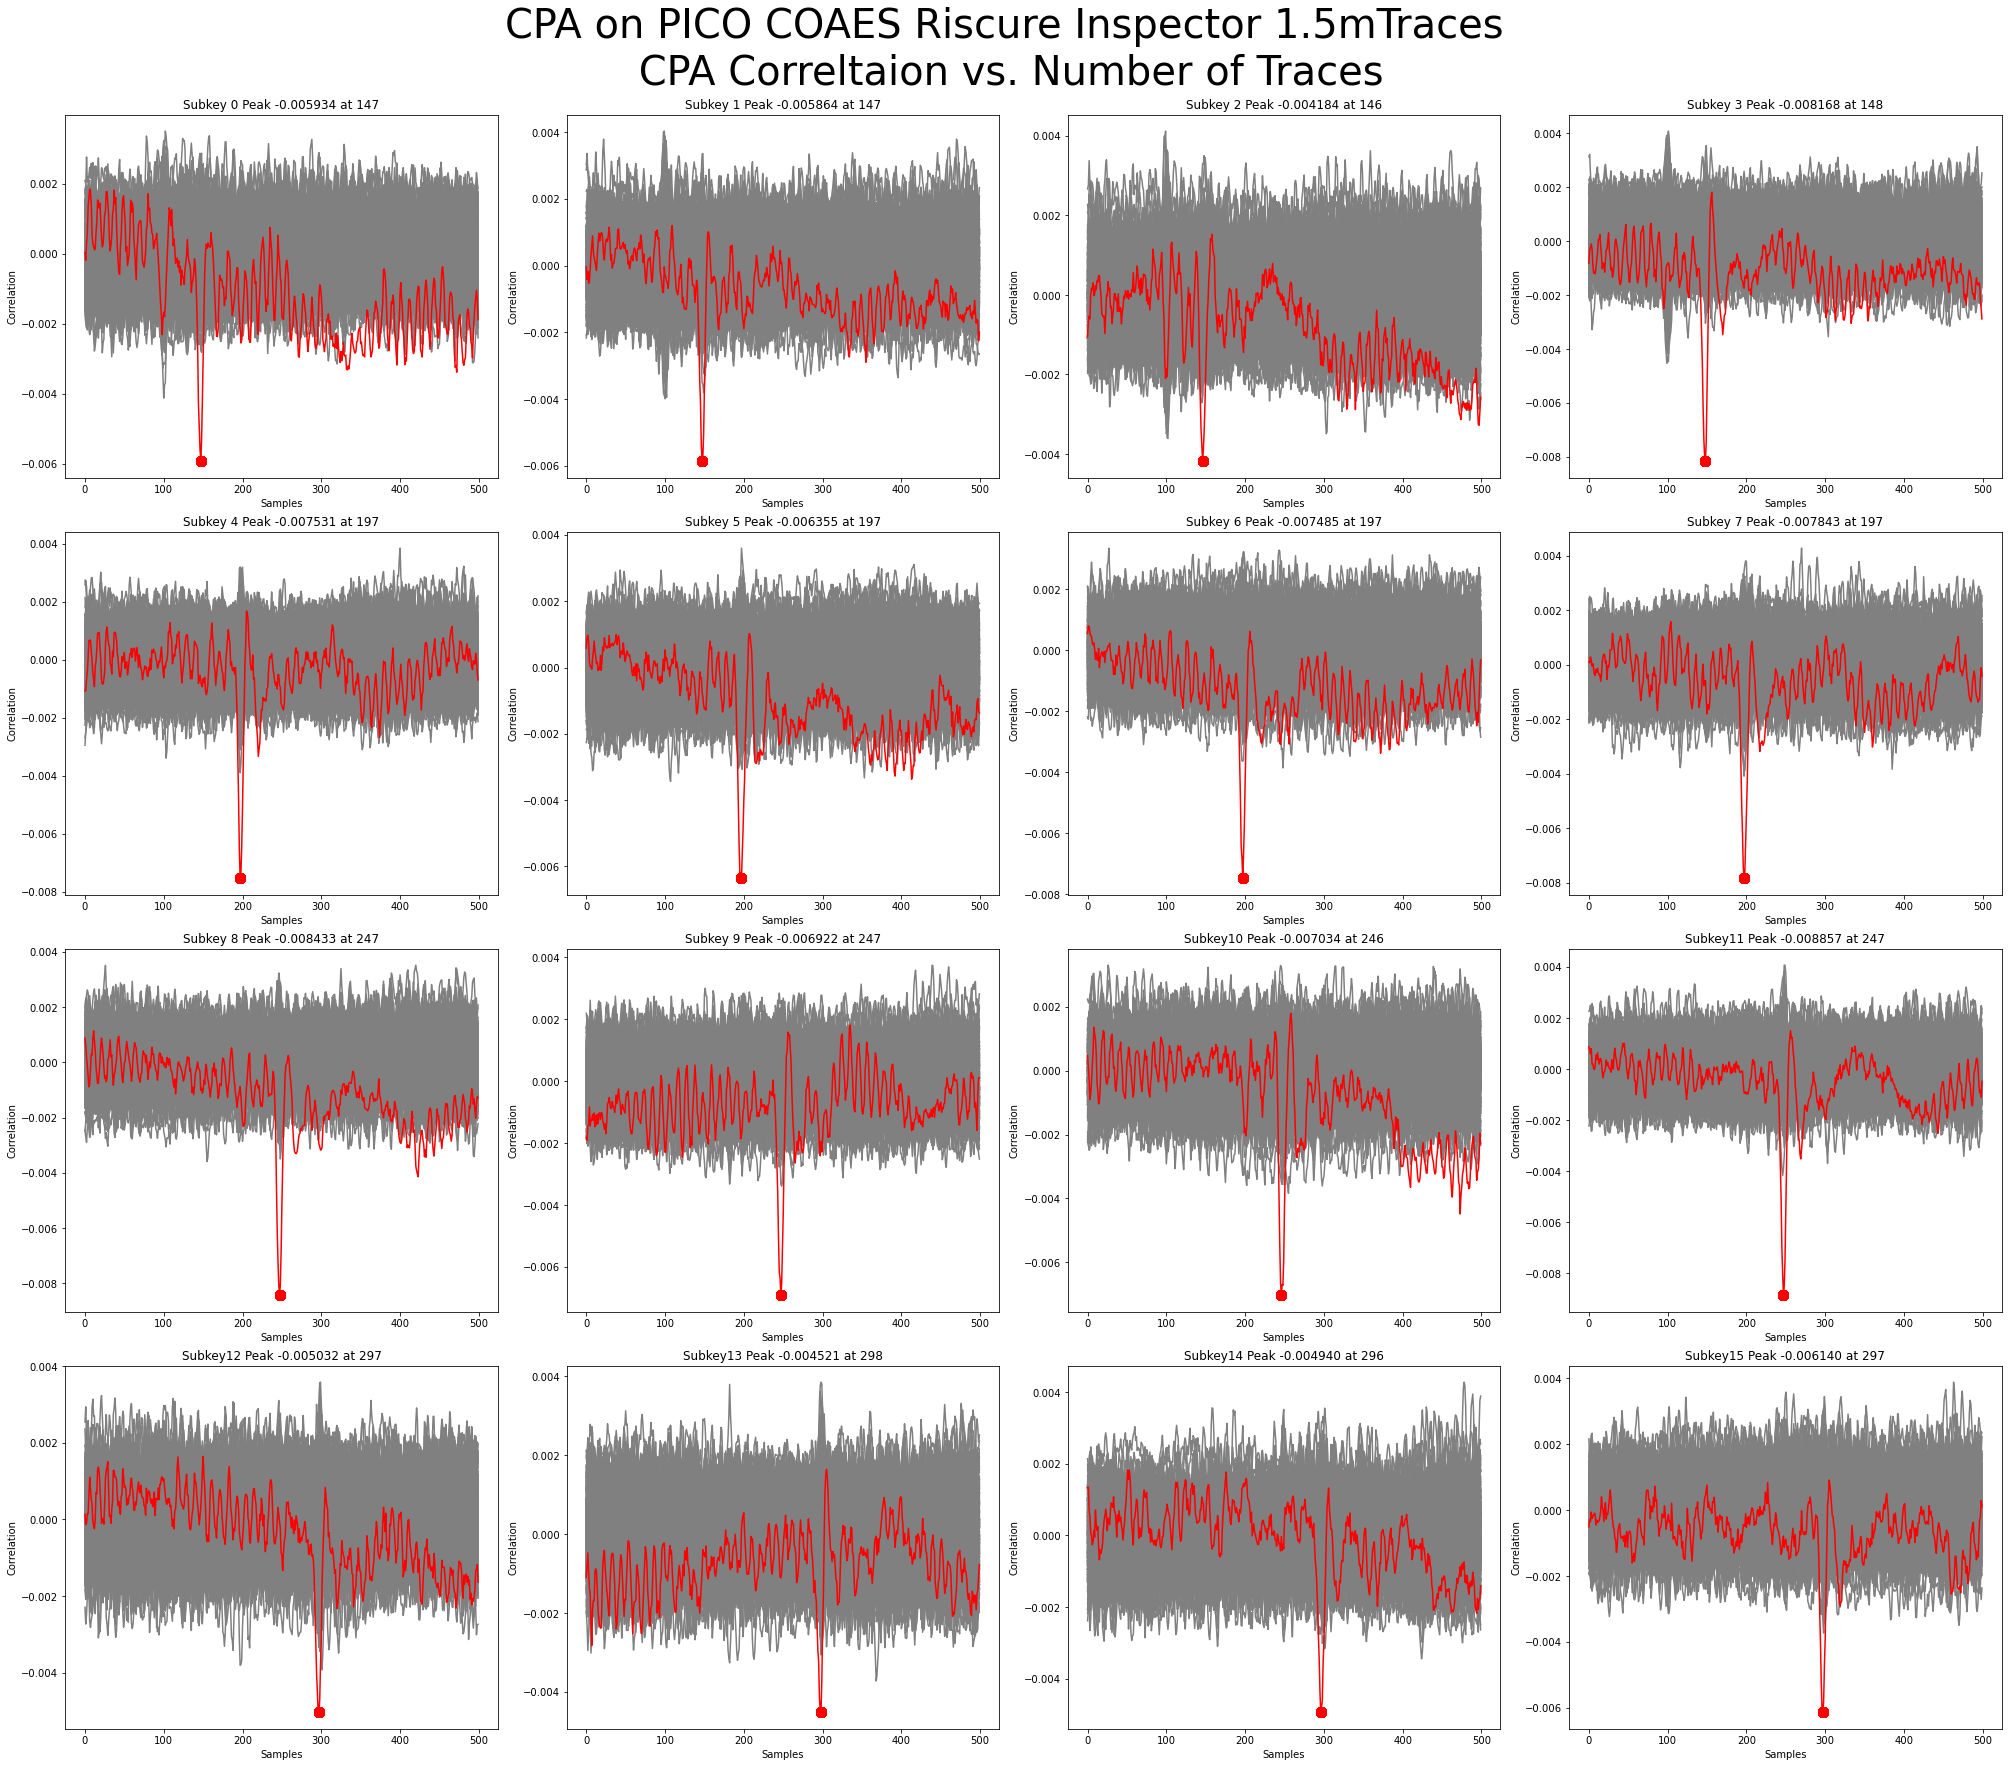

In [90]:
import pylab

plt.figure()

f, axs = plt.subplots(4,4,figsize=(28,25))

value = 1

for subkey in range (16):
    pylab.subplot(4,4,value)
    for guess in range(0, 256):
        if (guess == key_array[subkey]):
            plt.plot(attack_results_per_byte[subkey][guess],color="red",linewidth=1.5, linestyle='-',zorder=255)
        else:
            plt.plot(attack_results_per_byte[subkey][guess],color="grey")
        corr = abs(attack_results_per_byte[subkey][key_array[subkey]])
        xmax = np.argmax(corr)
        ymax = corr.max()
        plt.plot([xmax],[-ymax],marker='.', markersize=20, color="red",zorder=255)
        plt.title('Subkey%2d Peak %2f at %d' %(subkey,-ymax,xmax))
        plt.xlabel('Samples')
        plt.ylabel('Correlation')
    value += 1

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.suptitle('CPA on PICO COAES Riscure Inspector 1.5mTraces\n CPA Correltaion vs. Number of Traces',size=40)

plt.savefig('2.jpg',dpi=100)  
plt.show()